In [1]:
from astropy.cosmology import FlatLambdaCDM, WMAP9, WMAP7, Planck15
import snsims
import pandas as pd
import numpy as np

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [5]:
from snsims import SersicSamples, PositionSamples
print(snsims.__VERSION__)

1.1.2


In [6]:
!which python

/Users/rbiswas/soft/LSST/DarwinX86/miniconda3/4.2.12.lsst1/bin/python


In [24]:
DC2 = FlatLambdaCDM(H0=71, Om0=0.265, Ob0=0.0448)

In [17]:
gals = pd.read_csv('~/data/LSST/DC2/protDC2.csv.gz')

In [18]:
gals.head()

,galaxy_id,diskMassStellar,morphology/diskMinorAxisArcsec,morphology/spheroidMinorAxisArcsec,size_bulge_true,size_disk_true,totalMassStellar,uniqueId,raJ2000,decJ2000,redshift,totalMassStellar_catsim,diskMassStellar_catsim
0,2,9.188840e+07,0.540305,0.704382,1.012213,0.557534,1.906675e+08,2127,58.371885,-30.473940,0.085527,1.906675e+08,9.188840e+07
1,4,3.019956e+08,0.351729,2.039884,2.855590,1.100472,1.066172e+09,4175,53.785395,-30.429106,0.084432,1.066172e+09,3.019956e+08
2,6,1.016041e+09,1.089987,0.423516,0.620078,1.864873,1.307787e+09,6223,56.889586,-30.470440,0.085076,1.307787e+09,1.016041e+09
3,7,1.270596e+08,0.092741,0.000000,0.000000,0.286710,1.270596e+08,7247,53.769881,-30.473563,0.166426,1.270596e+08,1.270596e+08
4,8,4.494000e+08,0.184095,0.000000,0.000000,0.241691,4.494000e+08,8271,53.759456,-30.481253,0.166445,4.494000e+08,4.494000e+08


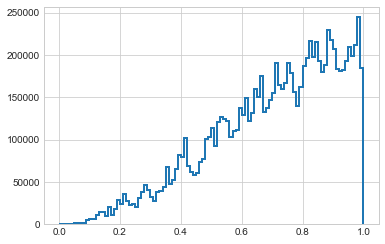

In [12]:
gals.redshift.hist(bins=np.arange(0., 1.01, 0.01), histtype='step', lw=2, alpha=1)

In [19]:
g = gals.query('redshift < 0.98')
del gals

## Expected SN numbers

Let us first get the hosted SN. This is upto z of 0.98 (the number of galaxies in protoDC2 fall off after that). We also use 90 percent of the SN, to keep about ten percent free 

In [25]:
zdist = snsims.PowerLawRates(rng=np.random.RandomState(1),
                             alpha = 0.9 * 2.6e-5,
                             fieldArea=25,
                             surveyDuration=10.,
                             zbinEdges=np.arange(0.001, 0.981, 0.02),
                             cosmo=DC2)

In [36]:
snparams = snsims.GMM_SALT2Params(len(zdist.zSamples), zdist.zSamples, snids=np.arange(len(zdist.zSamples)), cosmo=DC2, mjdmin=59580.,
                       surveyDuration=10.0, rng=np.random.RandomState(0))

In [38]:
snparams.paramSamples.head()

,c,mB,x0,x1,z
0,-0.009488,-19.215042,7.674651e+11,0.381204,0.021398
1,0.004317,-19.151248,7.216269e+11,1.112838,0.041524
2,-0.083242,-19.483806,9.791446e+11,1.305007,0.041566
3,0.009558,-19.391648,9.031310e+11,0.351235,0.045924
4,-0.070306,-19.269844,8.056477e+11,0.820541,0.058201


In [21]:
print(len(g))

9592788


In [27]:
!pwd

/Users/rbiswas/doc/projects/DESC/DC2_Repo/scripts/TransientSimulation


In [ ]:
class HostAssignment(object):
    def __init__(self, galsdf, zdist):
        

In [22]:
g.head()

,galaxy_id,diskMassStellar,morphology/diskMinorAxisArcsec,morphology/spheroidMinorAxisArcsec,size_bulge_true,size_disk_true,totalMassStellar,uniqueId,raJ2000,decJ2000,redshift,totalMassStellar_catsim,diskMassStellar_catsim
0,2,9.188840e+07,0.540305,0.704382,1.012213,0.557534,1.906675e+08,2127,58.371885,-30.473940,0.085527,1.906675e+08,9.188840e+07
1,4,3.019956e+08,0.351729,2.039884,2.855590,1.100472,1.066172e+09,4175,53.785395,-30.429106,0.084432,1.066172e+09,3.019956e+08
2,6,1.016041e+09,1.089987,0.423516,0.620078,1.864873,1.307787e+09,6223,56.889586,-30.470440,0.085076,1.307787e+09,1.016041e+09
3,7,1.270596e+08,0.092741,0.000000,0.000000,0.286710,1.270596e+08,7247,53.769881,-30.473563,0.166426,1.270596e+08,1.270596e+08
4,8,4.494000e+08,0.184095,0.000000,0.000000,0.241691,4.494000e+08,8271,53.759456,-30.481253,0.166445,4.494000e+08,4.494000e+08


In [27]:
t = g['morphology/diskMinorAxisArcsec']/g['size_disk_true']

In [28]:
t.describe()

count    9.182273e+06
mean     6.208773e-01
std      1.982558e-01
min      9.990999e-02
25%      4.673375e-01
50%      6.302478e-01
75%      7.860141e-01
max      9.999954e-01
dtype: float64

In [13]:
rng = np.random.RandomState(8)

In [15]:
x = snsims.CatSimPositionSampling(rng, galdf=g, snAngularUnits='degrees')

In [66]:
ss = snsims.SersicSamples(rng=np.random.RandomState(0))

In [69]:
snsims.SersicSamples.sampleAngles(1., 0.3, numSamples=1)

array([ 205.76869149])

In [78]:
np.repeat(3, 4)

array([3, 3, 3, 3])

In [31]:
galangs = pd.DataFrame(dict(pa_disk=[0], a_d=[1], b_d=[0.3]))

In [54]:
galangs

,a_d,b_d,pa_disk
0,1,0.3,0


In [59]:
galangs['b_d'] =0.3

In [60]:
xx = list(x.t)

AttributeError: 'CatSimPositionSampling' object has no attribute 't'

In [61]:
ll = list(x.SampleDiskAngles(galangs) for i in range(5000))

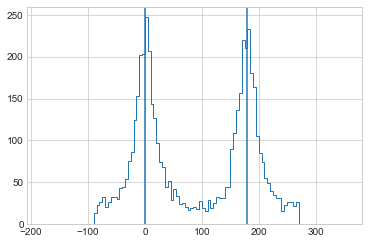

In [62]:
fig, ax = plt.subplots()
_ = ax.hist(ll, bins=np.arange(-180., 360., 5), histtype='step')
ax.axvline(0.)
ax.axvline(180.)

In [63]:
galangs

,a_d,b_d,pa_disk
0,1,0.3,0


In [53]:
-np.min(ll) + np.max(ll)

359.77596303809366

In [33]:
x.theta(galangs)

KeyError: 'diskAngle'

In [64]:
np.ravel(3)

array([3])

In [34]:
from snsims import SersicSamples

In [ ]:
Class DC2_assignments(object):
    
    def __init__(self, rng, galdf, snAngularUnits='degree', hostSelectionConstraints='Redshift < 0.96'):
        if hostSelectionConstraints is None:
            self.galdf = galdf
        else:
            self.galdf = galdf.query(hostSelectionConstraint)
        self.rng = rng
        self.ss = SersicSamples(rng=self.rng)
    
    def select_host()

In [48]:
sss= snsims.GMM_SALT2Params(100, np.random.uniform(0, 0.1, size=100),
                            snids=None, mjdmin=59580., rng=np.random.RandomState(0))

In [50]:
sss.snids

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

In [42]:
sss = snsims.SimpleSALTDist(100, np.random.uniform(0, 0.1, size=100), snids=None, mjdmin=59580., rng=np.random.RandomState(0))

In [43]:
sss.mjdmin

59580.0

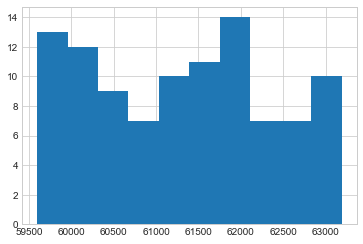

In [45]:
sss.paramSamples.t0.hist()